In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import math
import plotly as clt

In [4]:
os.chdir(r"C:\Users\Stifmeister\Downloads\tesla-stock-price")
print(os.getcwd())
print(os.listdir(os.getcwd()))

C:\Users\Stifmeister\Downloads\tesla-stock-price
['1.csv.csv']


In [5]:
df = pd.read_csv("1.csv.csv")

In [9]:
print(len(df))
df['Date']=pd.to_datetime(df['Date'])
df.head()

1692


,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [10]:
df=df[['Date','Open','High','Low','Close','Volume']] #Selecting the Features of the DataFrame
df['Profit']=(df['Open']-df['Close'])
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0  #introducing a new feature HL_PCT comparing the variation in Stock Price
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0  #PCT_Change comparing the fluctuation in price on a single day
df1 = df[['Date','Open','High','Low','Close','Profit','HL_PCT','PCT_change','Volume']]

In [23]:
df1.tail()

,Date,Open,High,Low,Close,Profit,HL_PCT,PCT_change,Volume
1687,2017-03-13,244.820007,246.850006,242.779999,246.169998,-1.349991,1.653332,0.551422,3010700
1688,2017-03-14,246.110001,258.119995,246.020004,258.000000,-11.889999,4.689919,4.831173,7575500
1689,2017-03-15,257.000000,261.000000,254.270004,255.729996,1.270004,2.631680,-0.494165,4816600
1690,2017-03-16,262.399994,265.750000,259.059998,262.049988,0.350006,2.552949,-0.133386,7100400
1691,2017-03-17,264.000000,265.329987,261.200012,261.500000,2.500000,1.579340,-0.946970,6475900


In [26]:
df1.describe()

,Open,High,Low,Close,Profit,HL_PCT,PCT_change,Volume
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03
mean,132.441572,134.769698,129.996223,132.428658,0.012914,4.060354,-0.013779,4.270741e+06
std,94.309923,95.694914,92.855227,94.313187,3.693203,2.578701,2.852107,4.295971e+06
min,16.139999,16.629999,14.980000,15.800000,-20.770004,0.909335,-19.753518,1.185000e+05
25%,30.000000,30.650000,29.214999,29.884999,-1.072506,2.512267,-1.457422,1.194350e+06
50%,156.334999,162.370002,153.150002,158.160004,0.049999,3.459133,-0.087937,3.180700e+06
75%,220.557495,224.099999,217.119999,220.022503,1.250000,4.832584,1.471805,5.662100e+06
max,287.670013,291.420013,280.399994,286.040009,20.509994,31.226452,25.736837,3.716390e+07


In [22]:
#Descriptive Analysis
print("Descriptive Analysis:")
print("Investors depend on stock analysis to find potentially profitable stocks.")
print("")
print("The maximum profit per share booked in a single day:",round(max(df1['Profit']),2),"Dollars")
print("The change rate through that Day:",round(max(df1['PCT_change']),2),"%")
print("")
print("The minimum profit booked per share in a single day:",round(min(df1['Profit']),2),"Dollars")
print("The change rate through that Day:",round(min(df1['PCT_change']),2),"%")

Descriptive Analysis:
Investors depend on stock analysis to find potentially profitable stocks.

The maximum profit per share booked in a single day: 20.51 Dollars
The change rate through that Day: 25.74 %

The minimum profit booked per share in a single day: -20.77 Dollars
The change rate through that Day: -19.75 %


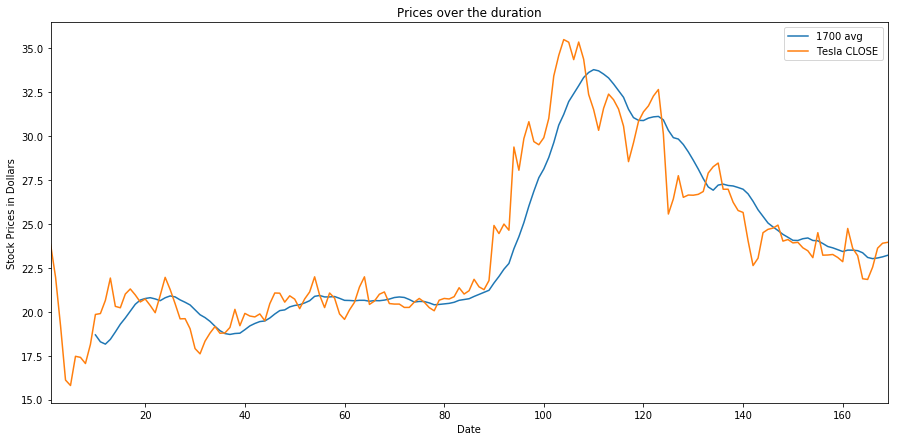

In [31]:
plt.figure(figsize=(15,7))
plt.xlabel('Date')
plt.ylabel('Stock Prices in Dollars')
plt.title('Prices over the duration')
df['Close'].loc['1':'1692'].rolling(window=10).mean().plot(label='1700 avg')
df['Close'].loc['1':'1692'].plot(label='Tesla CLOSE')
plt.legend()

In [32]:
#fig= plt.figure(figsize=(12,6))
#plt.xlabel('Date')
#plt.ylabel('Stock Prices in Dollars')
#plt.title('Opening price over 1700 days')
#df['Open'].plot()
#plt.show()

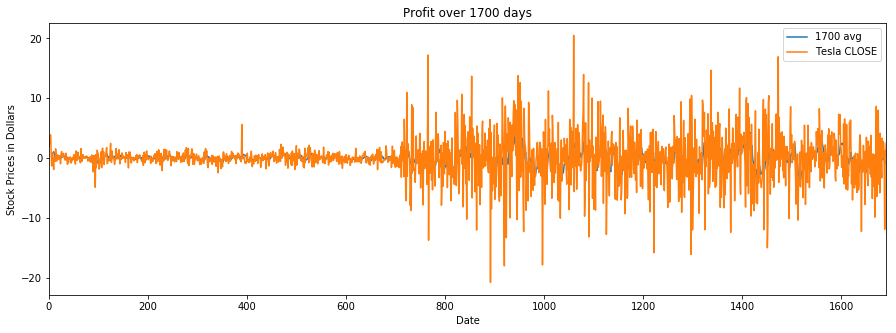

In [34]:
fig= plt.figure(figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Stock Prices in Dollars')
plt.title('Profit over 1700 days')
df['Profit'].loc['1':'len(df)'].rolling(window=10).mean().plot(label='1700 avg')
df['Profit'].loc['1':'len(df)'].plot(label='Tesla CLOSE')
#df['Profit'].plot()
plt.legend()


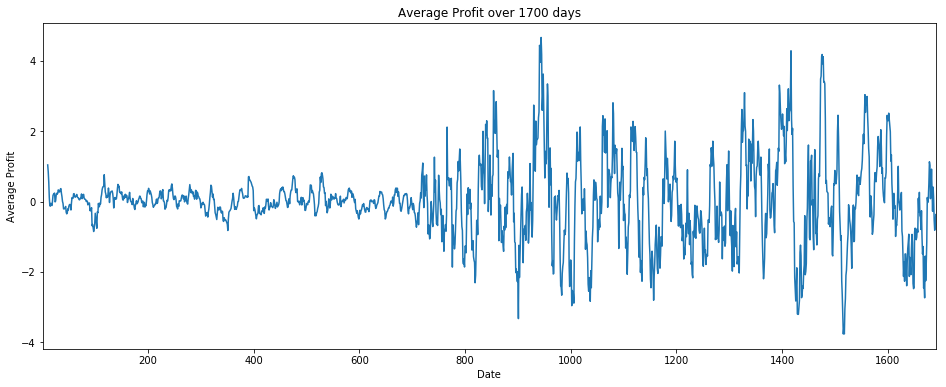

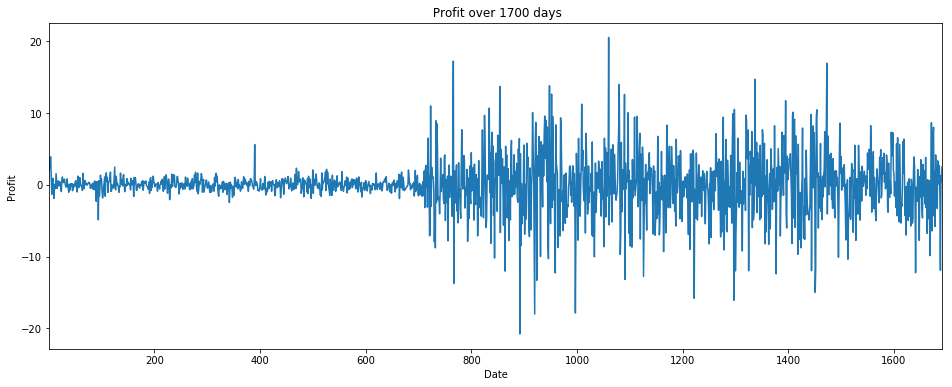

In [38]:
f1 = plt.figure(figsize=(16,6))
plt.xlabel('Date')
plt.ylabel('Average Profit')
plt.title('Average Profit over 1700 days')
df['Profit'].loc['1':'len(df)'].rolling(window=10).mean().plot(label='1700 avg')
f2 = plt.figure(figsize=(16,6))
df['Profit'].loc['1':'len(df)'].plot(label='Tesla CLOSE')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title(' Profit over 1700 days')
plt.show()


In [79]:
#Comparing The above two Graphs i.e Opening v/s profit 
print("Though The Price of the Share Has Gone up.The Profits have highly been unstable for the later part of the stock sess.")
print("The exact same interpretation can be analyzed by manual analyzing the data")
print("")
print("The mean profit through all days is:",round(df['Profit'].mean(axis = 0),3))
print("The standard Deviation viz a viz the mean is:",round(df['Profit'].std(axis=0),3))
print("The Standard Deviation seems pretty high viz a viz the mean profit indicating high variablity in profit")

Though The Price of the Share Has Gone up.The Profits have highly been unstable for the later part of the stock sess.
The exact same interpretation can be analyzed by manual analyzing the data

The mean profit through all days is: 0.013
The standard Deviation viz a viz the mean is: 3.693
The Standard Deviation seems pretty high viz a viz the mean profit indicating high variablity in profit


P/E Ratio
A common method to analyzing a stock is studying its price-to-earnings ratio. You calculate the P/E ratio by dividing the  stock’s market value per share by its earnings per share. To determine the value of a stock, investors compare a stock’s  P/E ratio to those of its competitors and industry standards. Lower P/E ratios are seen as favorable by investors.

P/E ratio in the year 1 0.51
P/E ratio in the year 2 0.95
P/E ratio in the year 3 2.27
P/E ratio in the year 4 6.67
P/E ratio in the year 5 6.88


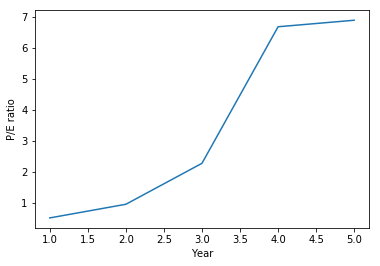


Refering to the above output the Return Rate Seems to be best in the year 1
During the 3rd,4th and 5th year the P/E ratio is not great,hence it is really necessary to keep an eye on this stock to    book profit.


In [45]:
#Calculating P/E ratio.
P_E=[]
print("P/E Ratio")
print("A common method to analyzing a stock is studying its price-to-earnings ratio. You calculate the P/E ratio by dividing the  stock’s market value per share by its earnings per share. To determine the value of a stock, investors compare a stock’s  P/E ratio to those of its competitors and industry standards. Lower P/E ratios are seen as favorable by investors.")
print("")
for i in range(0,len(df),365):
    Purchase_val=df1['Open'][i]
    Earnings=(df1['Close'][i]+365)-(df1['Open'][i])
    PtoE=Purchase_val/Earnings*10
    print("P/E ratio in the year",(i+365)//365,round(PtoE,2))
    P_E.append(round(PtoE,2))
    #plt.plot((i+365)//365,PtoE,'ro')
plt.plot([1,2,3,4,5],P_E)    
plt.xlabel('Year')
plt.ylabel('P/E ratio')
plt.show()    
print("")    
print("Refering to the above output the Return Rate Seems to be best in the year 1")
print("During the 3rd,4th and 5th year the P/E ratio is not great,hence it is really necessary to keep an eye on this stock to    book profit.")

Calculating PEG
The price-to-earnings growth ratio takes the P/E ratio a step further by considering the growth of a company. To calculate the PEG, you divide the P/E ratio by the 12-month growth rate. You estimate the future growth rate by looking at the        company’s historical growth rate. Investors typically consider a stock valuable if the PEG is lower than 1.

PEG ratio in the year 1 0.03
PEG ratio in the year 2 0.09
PEG ratio in the year 3 0.53
PEG ratio in the year 4 4.44
PEG ratio in the year 5 4.75


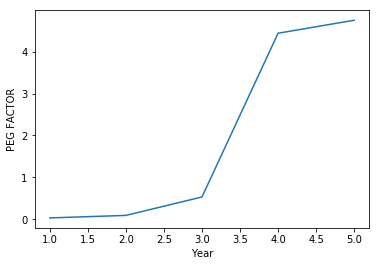

The higher volatility and high PEG classifies this particular stock highly vulnerable from 4th year onwards.


In [48]:
#Calculating PEG
P_E_G=[]
print("Calculating PEG")
print("The price-to-earnings growth ratio takes the P/E ratio a step further by considering the growth of a company. To calculate the PEG, you divide the P/E ratio by the 12-month growth rate. You estimate the future growth rate by looking at the        company’s historical growth rate. Investors typically consider a stock valuable if the PEG is lower than 1.")
print("")
for i in range(0,len(df),365):
    Purchase_val=df1['Open'][i]
    Earnings=(df1['Close'][i]+365)-(df1['Open'][i])
    Growth_ratio=((df1['Open'][i]+365)-(df1['Open'][i]))/(df1['Open'][i])
    PtoE=Purchase_val/Earnings*10
    PEG=PtoE/Growth_ratio
    P_E_G.append(round(PEG,2))
    #plt.plot((i+365)//365,PEG,'ro')
    print("PEG ratio in the year",(i+365)//365,round(PEG,2))
plt.xlabel('Year')
plt.plot([1,2,3,4,5],P_E_G)
plt.ylabel('PEG FACTOR')
plt.show()    
print("The higher volatility and high PEG classifies this particular stock highly vulnerable from 4th year onwards.")    

In [ ]:
#Final Analysis
#The stock prices have always increased over a period of time
#From 3rd year onwards the stock has been pretty volatile,hence requires a constant watch on the the prices in order to book Profit.
#The stock can be recommended to regular traders but not as a safe longtime investment